## Ridge and Lasso Regression

### Import Libraries

In [231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [232]:
df=pd.read_csv(r"C:\Users\ASUS\Desktop\train.csv")

In [233]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Data Preprocessing

#### Dealing with Null Values

In [234]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [235]:
df['LotFrontage']=df['LotFrontage'].replace(np.NaN,df['LotFrontage'].mean())


In [236]:
df.shape

(1460, 81)

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [238]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [239]:
df=df.drop(["MiscFeature","Fence","PoolQC","Alley"],axis=1)

In [240]:
df.shape

(1460, 77)

In [241]:
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [242]:
df['FireplaceQu']=df['FireplaceQu'].replace(np.NaN,'Gd')



In [243]:
df.isnull().values.sum()

609

In [244]:
df=df.dropna()

In [245]:
df.isnull().values.sum()

0

In [246]:
# Seperating the Categorical columns from the data
cat_data = df.select_dtypes(include=['object'])
p=cat_data.columns

#### Visualizing Categorical Data

In [247]:
import seaborn as sns

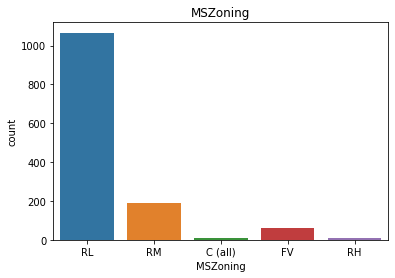

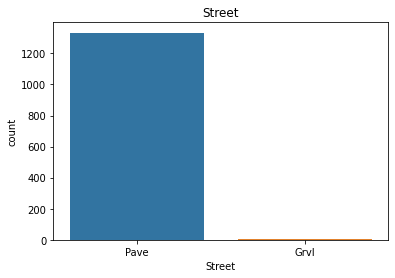

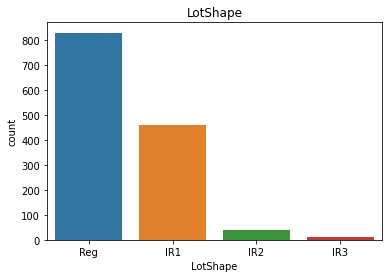

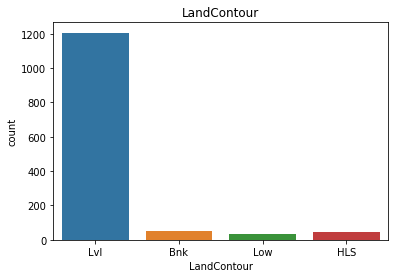

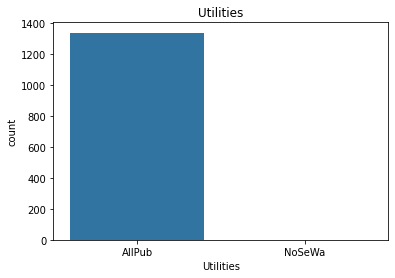

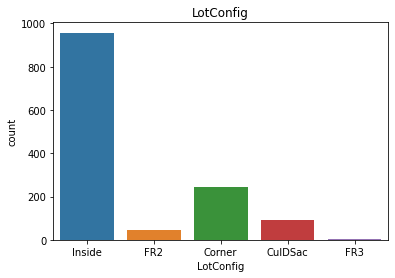

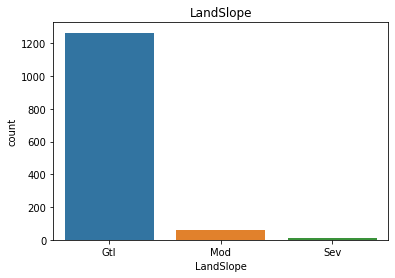

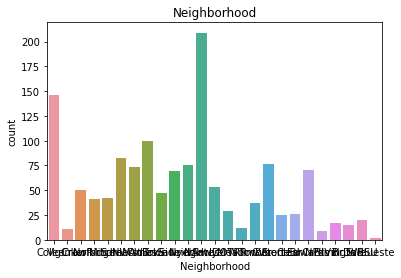

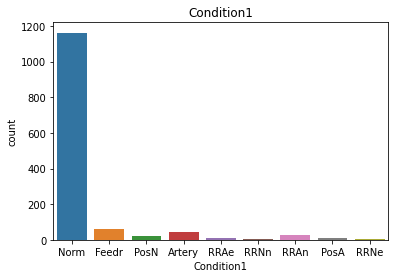

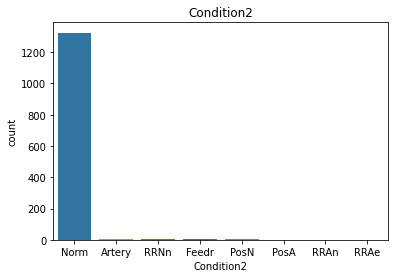

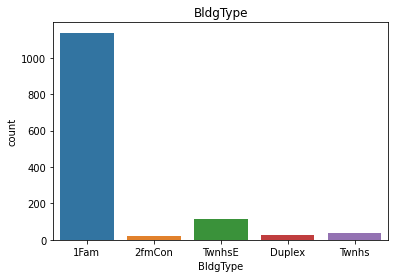

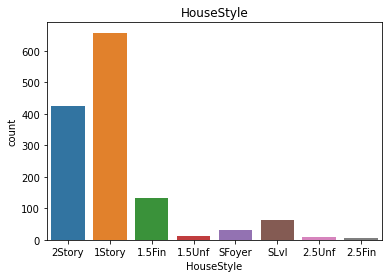

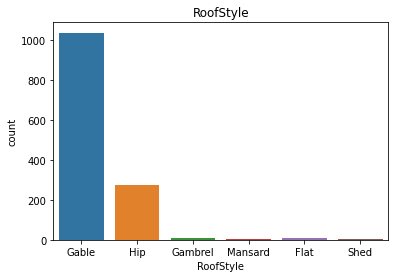

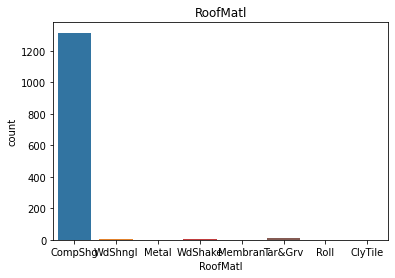

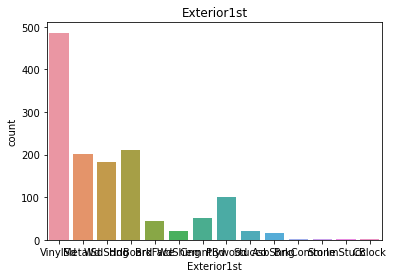

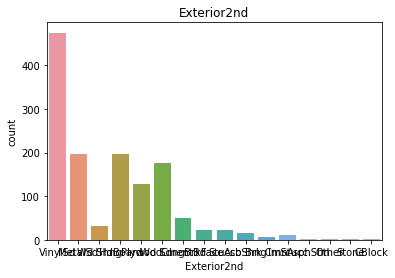

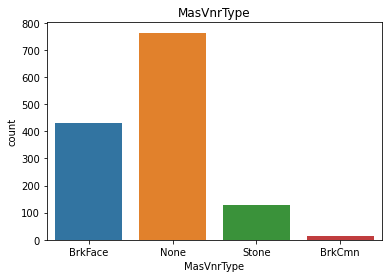

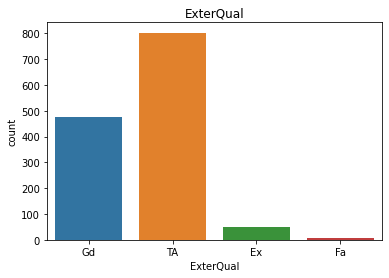

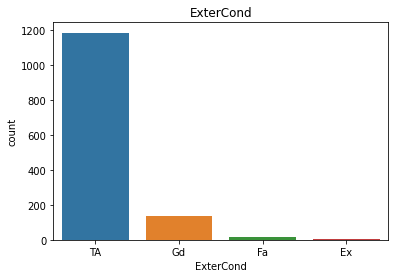

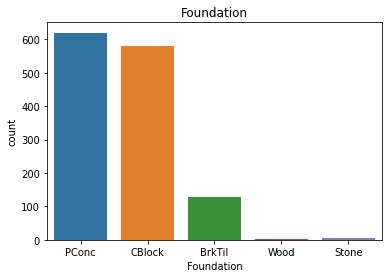

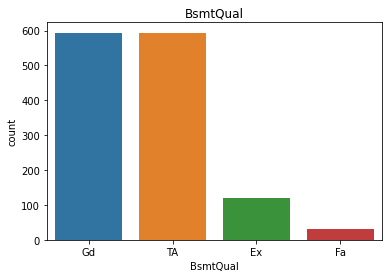

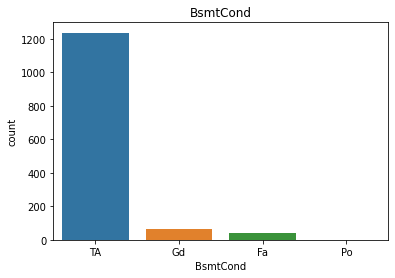

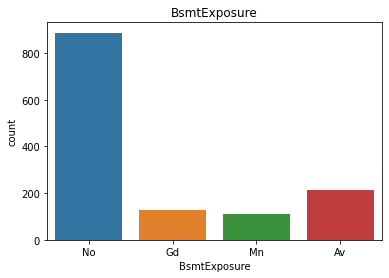

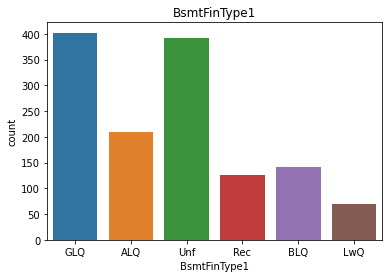

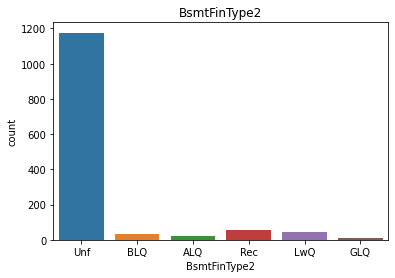

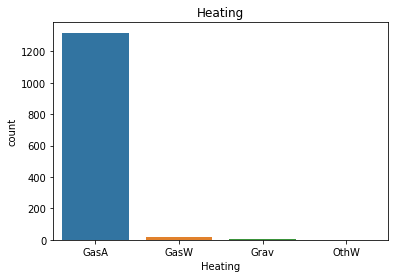

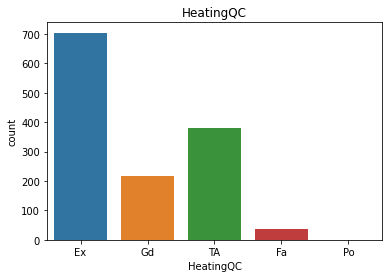

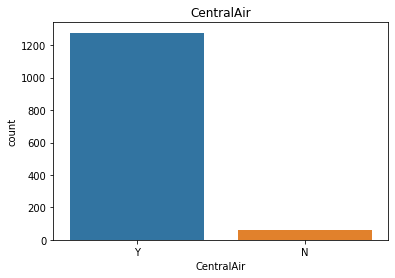

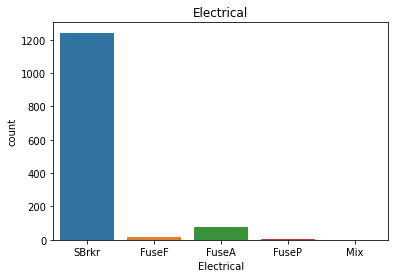

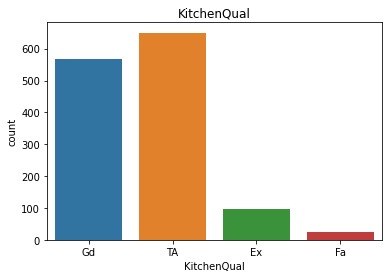

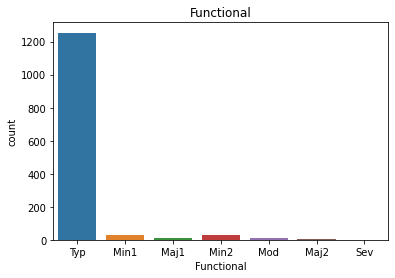

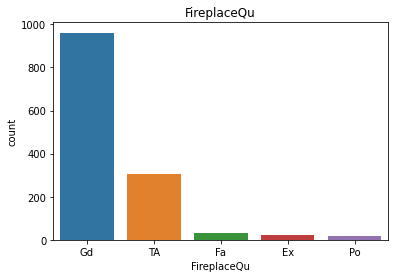

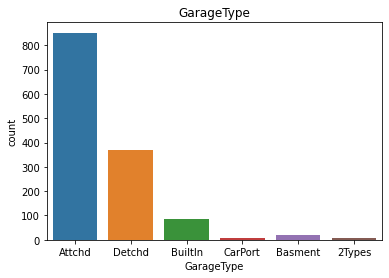

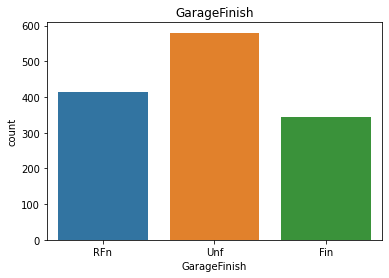

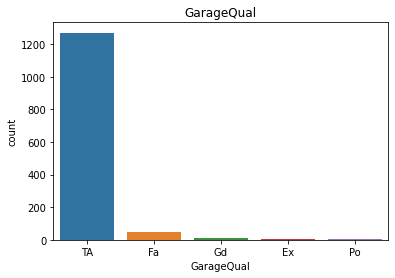

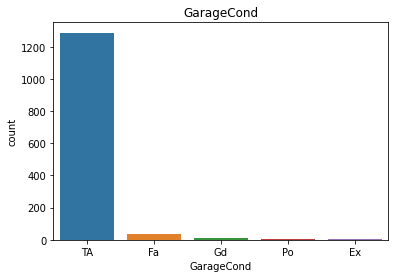

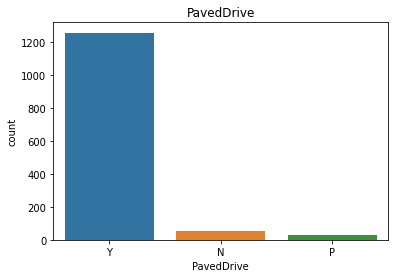

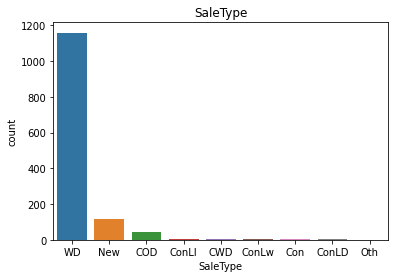

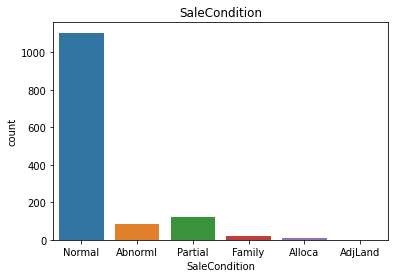

In [248]:
def fn(p):
    for i in p:
        sns.countplot(x=i, data=df)
        plt.title(i)
        plt.show()
fn(p)

In [249]:
def fn2(p):
    for i in p:
        s=df[i].value_counts()
        print(i)
        print(s)
fn2(p)

MSZoning
RL         1066
RM          191
FV           62
RH           11
C (all)       8
Name: MSZoning, dtype: int64
Street
Pave    1333
Grvl       5
Name: Street, dtype: int64
LotShape
Reg    829
IR1    459
IR2     40
IR3     10
Name: LotShape, dtype: int64
LandContour
Lvl    1206
Bnk      52
HLS      48
Low      32
Name: LandContour, dtype: int64
Utilities
AllPub    1337
NoSeWa       1
Name: Utilities, dtype: int64
LotConfig
Inside     957
Corner     244
CulDSac     90
FR2         43
FR3          4
Name: LotConfig, dtype: int64
LandSlope
Gtl    1265
Mod      61
Sev      12
Name: LandSlope, dtype: int64
Neighborhood
NAmes      209
CollgCr    146
OldTown    100
Somerst     83
Gilbert     77
NridgHt     75
NWAmes      73
Edwards     70
Sawyer      69
SawyerW     53
Crawfor     50
BrkSide     47
Mitchel     42
NoRidge     41
Timber      37
IDOTRR      29
ClearCr     26
StoneBr     25
SWISU       20
Blmngtn     17
BrDale      15
MeadowV     12
Veenker     11
NPkVill      9
Blueste      2

In [250]:
df=df.drop(['Street','Condition2','RoofStyle','Heating','Id'],axis=1)
df.shape


(1338, 72)

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1338 non-null   int64  
 1   MSZoning       1338 non-null   object 
 2   LotFrontage    1338 non-null   float64
 3   LotArea        1338 non-null   int64  
 4   LotShape       1338 non-null   object 
 5   LandContour    1338 non-null   object 
 6   Utilities      1338 non-null   object 
 7   LotConfig      1338 non-null   object 
 8   LandSlope      1338 non-null   object 
 9   Neighborhood   1338 non-null   object 
 10  Condition1     1338 non-null   object 
 11  BldgType       1338 non-null   object 
 12  HouseStyle     1338 non-null   object 
 13  OverallQual    1338 non-null   int64  
 14  OverallCond    1338 non-null   int64  
 15  YearBuilt      1338 non-null   int64  
 16  YearRemodAdd   1338 non-null   int64  
 17  RoofMatl       1338 non-null   object 
 18  Exterior

#### Visualizing Integer Data 

In [252]:
int_data = df.select_dtypes(include=['int64'])
s=int_data.columns


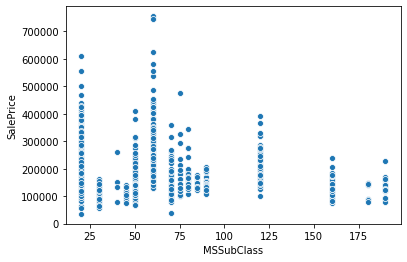

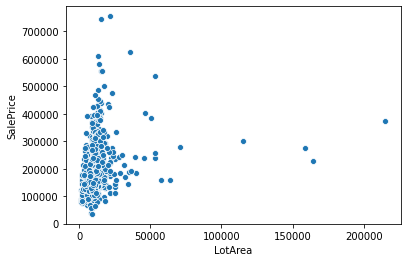

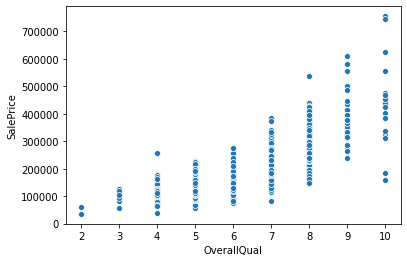

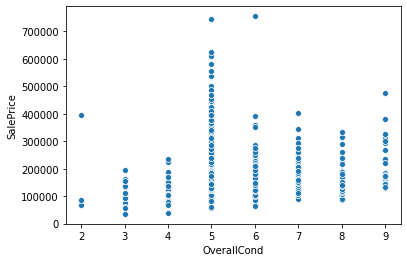

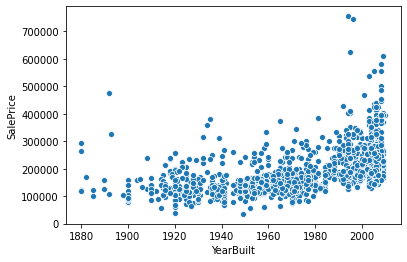

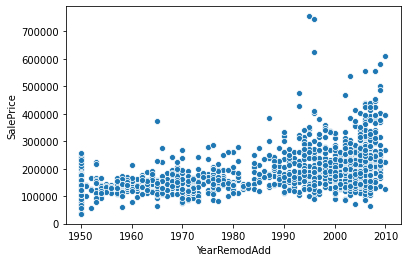

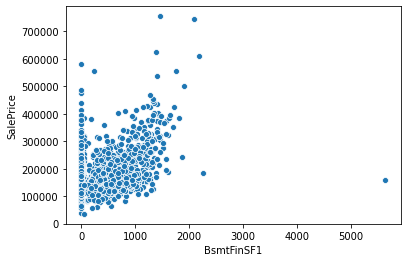

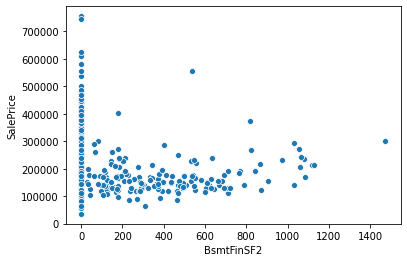

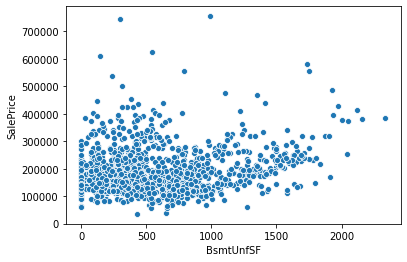

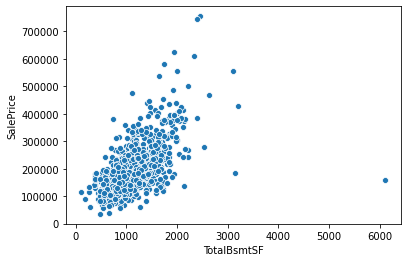

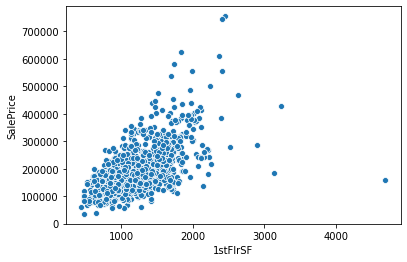

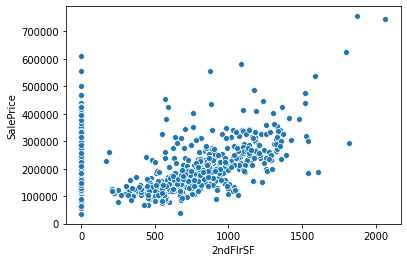

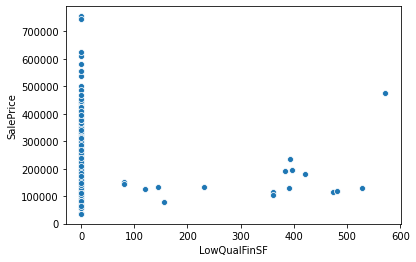

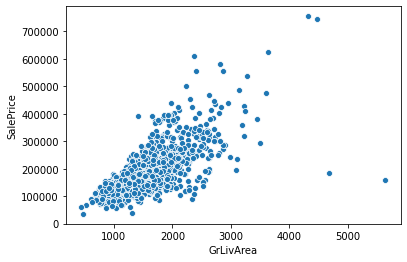

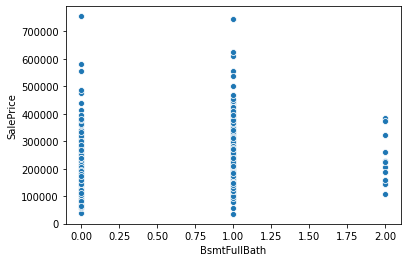

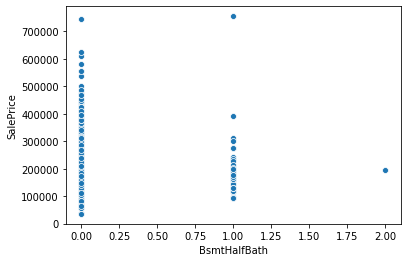

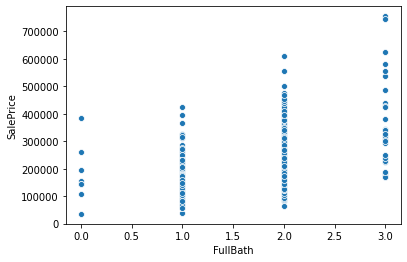

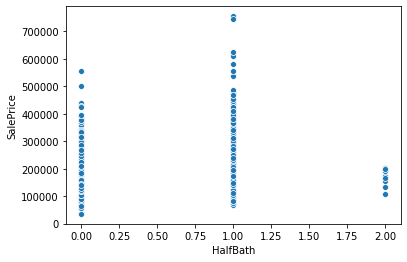

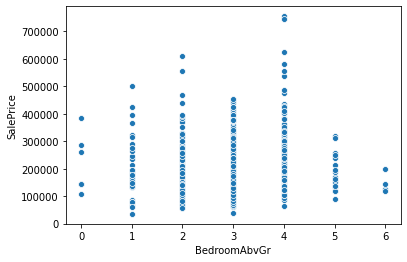

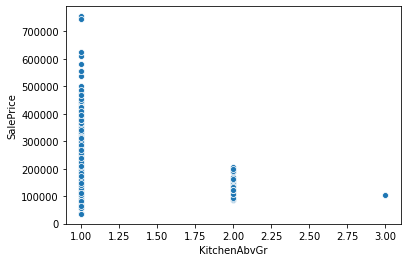

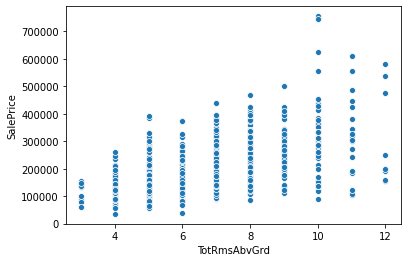

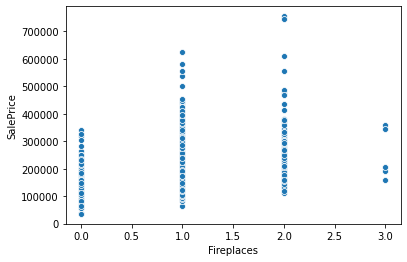

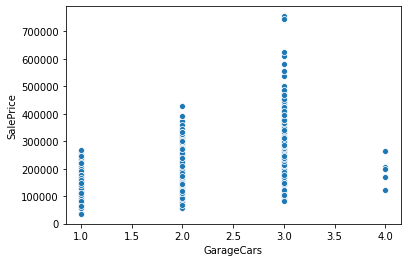

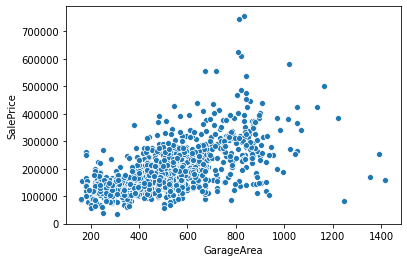

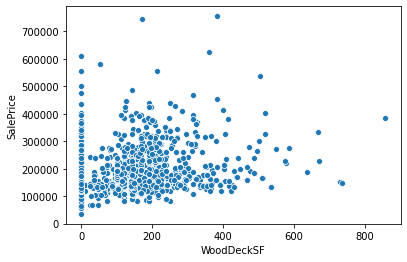

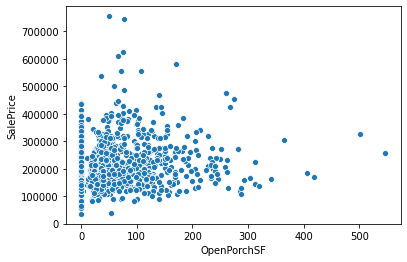

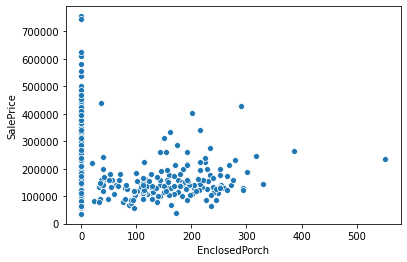

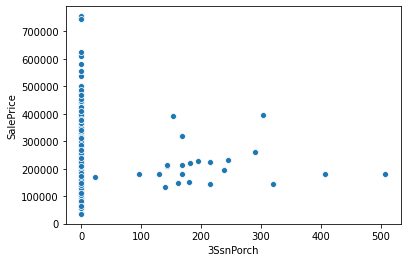

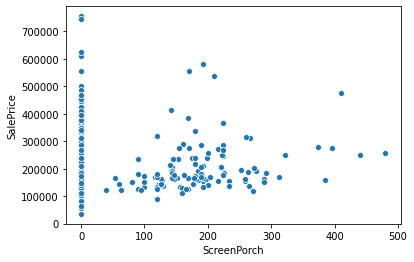

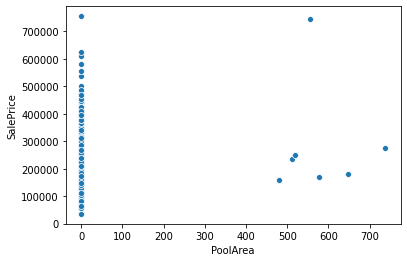

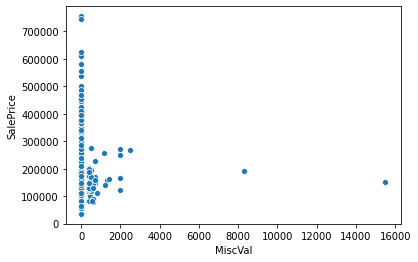

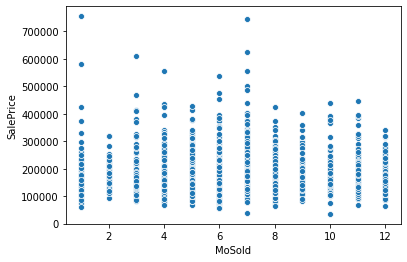

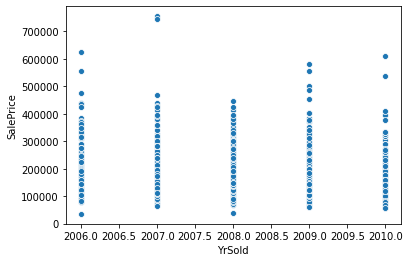

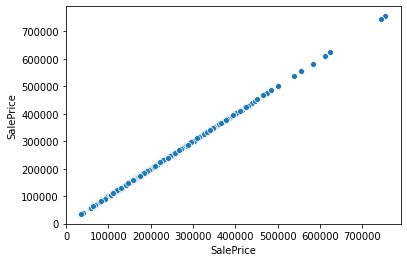

In [253]:
def fn3(a):
    for i in a:
        sns.scatterplot(x=df[i],y=df['SalePrice'],data=df)
        
        plt.show()
fn3(s)

In [254]:
df = df[df['PoolArea']< 200]
df=df[df['BsmtHalfBath']<1.75]
df=df[df['BsmtFullBath']<2.5]
df=df[df['TotalBsmtSF']<4000]
df=df[df['1stFlrSF']<4000]
df.shape

(1330, 72)

In [255]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]


In [256]:
cat_data = X.select_dtypes(include=['object'])
p=cat_data.columns

#### Converting Categorical Data to numeric

In [257]:
dummies=pd.get_dummies(cat_data,drop_first=True)
dummies

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1456,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1457,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1458,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [258]:
X=X.drop(cat_data,axis=1)
X

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,460,0,40,0,0,0,0,0,8,2007
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,500,349,0,0,0,0,0,0,2,2010
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,252,0,60,0,0,0,0,2500,5,2010
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,240,366,0,112,0,0,0,0,4,2010


In [259]:
X=pd.concat([X,dummies],axis=1)

In [260]:
X

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,0,1,0,0,0,1,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,0,1,0,0,0,1,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,0,0,0,1,0,0,0,1,0
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,0,0,0,0,1,0,0,0,1,0


In [261]:
X.isnull().values.sum()

0

#### Normalizing the data

In [262]:
from sklearn.preprocessing import StandardScaler


In [263]:
i_f_data = X.select_dtypes(include=['int64','float64'])
s=i_f_data.columns


In [264]:
scaler = StandardScaler()
X[s] = scaler.fit_transform(X[s])

In [265]:
X.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.095492,-0.254108,-0.214377,0.597616,-0.554096,1.014694,0.854357,0.463939,0.568715,-0.29375,...,0,0,0,0,1,0,0,0,1,0
1,-0.873080,0.465052,-0.102135,-0.160809,2.226838,0.101469,-0.474585,-0.595365,1.194849,-0.29375,...,0,0,0,0,1,0,0,0,1,0
2,0.095492,-0.110276,0.058908,0.597616,-0.554096,0.947047,0.805137,0.280182,0.062283,-0.29375,...,0,0,0,0,1,0,0,0,1,0
3,0.337635,-0.493828,-0.107015,0.597616,-0.554096,-1.961741,-0.769905,-0.595365,-0.559247,-0.29375,...,0,0,0,0,1,0,0,0,0,0
4,0.095492,0.656828,0.352691,1.356040,-0.554096,0.913224,0.706696,1.296249,0.451315,-0.29375,...,0,0,0,0,1,0,0,0,1,0


#### Splitting Data

In [266]:
from sklearn.model_selection import train_test_split


In [284]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

#### Linear Regression

In [285]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

regr=LinearRegression()
regr.fit(X_train,Y_train)



LinearRegression()

In [286]:
mse = np.mean((regr.predict(X_test) - Y_test)**2)
mse

1.780193018510165e+28

In [287]:
print(metrics.r2_score(y_true=Y_train, y_pred=regr.predict(X_train)))

0.9199292854250947


In [288]:
print(metrics.r2_score(Y_test, regr.predict(X_test)))

-3.17971688327497e+18


#### Ridge Regression

In [289]:
from sklearn.linear_model import Ridge

In [290]:
from sklearn.model_selection import GridSearchCV

In [291]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regr=GridSearchCV(ridge,parameters)
ridge_regr.fit(X_train,Y_train)

C:\Users\ASUS\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.05676e-21): result may not be accurate.
  overwrite_a=True).T


GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]})

In [292]:
print(ridge_regr.best_params_)
print(ridge_regr.best_score_)

{'alpha': 20}
0.8644855613903099


In [293]:
print(metrics.r2_score(y_true=Y_train, y_pred=ridge_regr.predict(X_train)))

0.9009222503612204


In [294]:
print(metrics.r2_score(y_true=Y_test, y_pred=ridge_regr.predict(X_test)))

0.8970453778158239


<AxesSubplot:xlabel='SalePrice'>

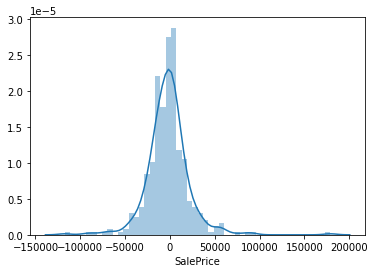

In [295]:
sns.distplot(Y_test-ridge_regr.predict(X_test))

#### Lasso Regression

In [279]:
from sklearn.linear_model import Lasso
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso=Lasso()
lasso_regr=GridSearchCV(lasso,parameters)

lasso_regr.fit(X_train,Y_train)

C:\Users\ASUS\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 107933539748.13336, tolerance: 408695078.4246772
  positive)
C:\Users\ASUS\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 151084823545.55887, tolerance: 395340535.33032745
  positive)
C:\Users\ASUS\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 155962096585.43658, tolerance: 400970278.03981817
  positive)
C:\Users\ASUS\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWa

C:\Users\ASUS\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3581017258.42334, tolerance: 400970278.03981817
  positive)
C:\Users\ASUS\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2682162994.0654907, tolerance: 418564226.81221974
  positive)
C:\Users\ASUS\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7365143898.404846, tolerance: 398144905.27797306
  positive)
C:\Users\ASUS\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarn

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]})

In [280]:
print(lasso_regr.best_params_)
print(lasso_regr.best_score_)

{'alpha': 100}
0.8431021225321389


In [281]:
print(metrics.r2_score(y_true=Y_train, y_pred=lasso_regr.predict(X_train)))

0.9068863520160049


In [282]:
print(metrics.r2_score(y_true=Y_test, y_pred=lasso_regr.predict(X_test)))

0.8806561199958878


<AxesSubplot:xlabel='SalePrice'>

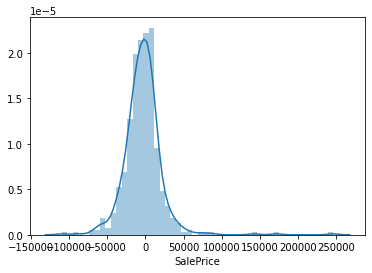

In [283]:

sns.distplot(Y_test-lasso_regr.predict(X_test))